<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 13: Dual Formulation of Support Vector Machines

### Applied Machine Learning

__Volodymyr Kuleshov__<br>Cornell Tech

# Announcements

* Assignment 3 is due on Wed
* Graded project proposals will be released today
* Prelim will be on 10/30, in class
* Practice prelim will be released today or tomorrow

# Part 1: Nearest Neighbors and Non-Parametric ML

In this lecture, we continue looking at Support Vector Machines (SVMs), and define a new formulation of the max-margin problem.

Before we do that, we start with a general concept---non-parametric algorithms.

# A Simple Classification Algorithm: Nearest Neighbors

Suppose we are given a training dataset ${D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$. At inference time, we receive a query point $x'$ and we want to predict its label $y'$.

A really simple but suprisingly effective way of returning $y'$ is the *nearest neighbors* approach.
* Given a query datapoint $x'$, find the training example $(x, y)$ in ${D}$ that's closest to $x'$, in the sense that $x$ is "nearest" to $x'$
* Return $y$, the label of the "nearest neighbor" $x$.

In the example below on the Iris dataset, the red cross denotes the query $x'$. The closest class to it is "Virginica". (We're only using the first two features in the dataset for simplicity.)

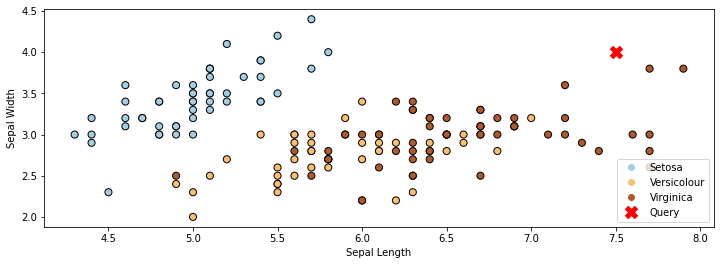

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# Plot also the training points
p1 = plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y,
            edgecolor='k', s=50, cmap=plt.cm.Paired)
p2 = plt.plot([7.5], [4], 'rx', ms=10, mew=5)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(['Query Point', 'Training Data'], loc='lower right')
plt.legend(handles=p1.legend_elements()[0]+p2, labels=['Setosa', 'Versicolour', 'Virginica', 'Query'], loc='lower right')

# Choosing a Distance Function

How do we select the point $x$ that is the closest to the query point $x'$? There are many options:

* The Euclidean distance $|| x - x' ||_2 = \sqrt{\sum_{j=1}^d |x_j - x'_j|^2)}$ is a popular choice.

* The Minkowski distance $|| x - x' ||_p = (\sum_{j=1}^d |x_j - x'_j|^p)^{1/p}$ generalizes the Euclidean, L1 and other distances.

* The Mahalanobis distance $\sqrt{x^\top V x}$ for a positive semidefinite matrix $V \in \mathbb{R}^{d \times d}$ also generalizes the Euclidean distnace.

* Discrete-valued inputs can be examined via the Hamming distance $|\{j : x_j \neq x_j'\}|$ and other distances.

Let's apply Nearest Neighbors to the above dataset using the Euclidean distance (or equiavalently, Minkowski with $p=2$)

Text(0, 0.5, 'Sepal Width')

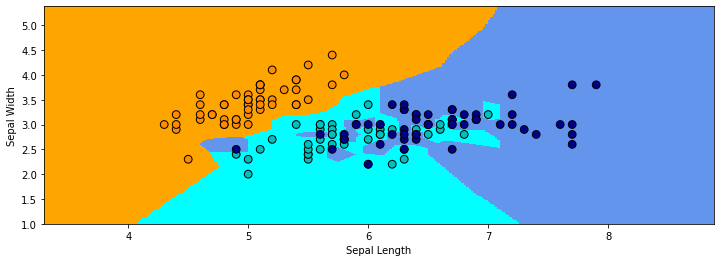

In [23]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
from sklearn import neighbors
from matplotlib.colors import ListedColormap

# Train a Nearest Neighbors Model
clf = neighbors.KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2)
clf.fit(iris_X.iloc[:,:2], iris_y)

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = iris_X.iloc[:, 0].min() - 1, iris_X.iloc[:, 0].max() + 1
y_min, y_max = iris_X.iloc[:, 1].min() - 1, iris_X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y, cmap=cmap_bold,
            edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

In the above example, the regions of the 2D space that are assigned to each class are highly irregular. In areas where the two classes overlap, the decision of the boundary flips between the classes, depending on which point is closest to it.

# K-Nearest Neighbors

Intuitively, we expect the true decision boundary to be smooth. Therefore, we average $K$ nearest neighbors at a query point.

* Given a query datapoint $x'$, find the $K$ training examples ${N} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(K)}, y^{(K)})\} \subseteq D$  closest to $x'$.
* Return $y_{N}$, the consensus label of the neighborhood ${N}$.

The consesus $y_{N}$ can be determined by voting, weighted average, kernels, etc.

Let's look at Nearest Neighbors with a neighborhood of 30. The decision boundary is much smoother than before.

Text(0, 0.5, 'Sepal Width')

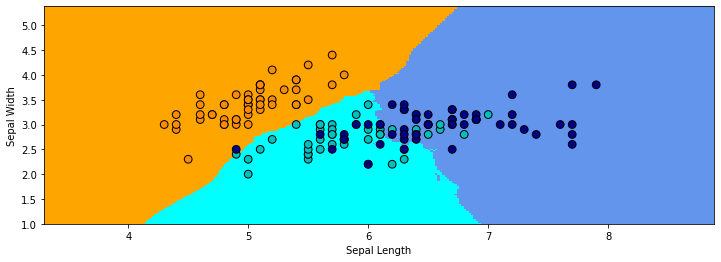

In [8]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# Train a Nearest Neighbors Model
clf = neighbors.KNeighborsClassifier(n_neighbors=30, metric='minkowski', p=2)
clf.fit(iris_X.iloc[:,:2], iris_y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y, cmap=cmap_bold,
            edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Algorithm: K-Nearest Neighbors

* __Type__: Supervised learning (regression and classification)
* __Model family__: Consensus over $K$ training instances.
* __Objective function__: Euclidean, Minkowski, Hamming, etc.
* __Optimizer__: Non at training. Nearest neighbor search at inference using specialized search algorithms (Hashing, KD-trees).
* __Probabilistic interpretation__: Directly approximating the density $P_\text{data}(y|x)$.

# Non-Parametric Models

Nearest neighbors is an example of a *non-parametric* model. 
<!-- Parametric vs. non-parametric are is a key distinguishing characteristic for machine learning models. -->

A parametric model $f_\theta(x) : {X} \times \Theta \to {Y}$ is defined by a finite set of parameters $\theta \in \Theta$ whose dimensionality is constant with respect to the dataset. Linear models of the form
$$ f_\theta(x) = \theta^\top x $$
are an example of a parametric model.

In a non-parametric model, the function $f$ uses the entire training dataset (or a post-proccessed version of it) to make predictions, as in $K$-Nearest Neighbors. 

In other words, the complexity of the model increases with dataset size.

# Pros and Cons of KNN

Pros:
* No information is lost at train time.
* Can approximate any data distribution arbtrarily well.

Cons:
* Need to store entire dataset to make queries, which is computationally prohibitive.
* Number of data needed scale exponentially with dimension ("curse of dimensionality").

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 2: Dual Formulation of SVMs

Let's now apply Lagrange duality to support vector machines.

# Review: Binary Classification & Linear Model

In this lecture, we will work with linear models of the form:
\begin{align*}
f_\theta(x) & = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d
\end{align*}
where $x \in \mathbb{R}^d$ is a vector of features and $y \in \{-1, 1\}$ is the target. The $\theta_j$ are the *parameters* of the model.

We can represent the model in a vectorized form
\begin{align*}
f_\theta(x) = \theta^\top x + \theta_0.
\end{align*}

# Review: Classification Margins

The margin $\gamma^{(i)}$ is the distance between the separating hyperplane and the datapoint $x^{(i)}$.
<center><img width=30% src="img/margin.png"></center>
Large margins are good: data should be far from the decision boundary.

# Review: Maximizing the Margin

We saw that maximizing the margin of a linear model amounts to solving the following optimization problem.
\begin{align*}
\min_{\theta,\theta_0} \frac{1}{2}||\theta||^2 \; &  \\
\text{subject to } \; & y^{(i)} f(x^{(i)}) \geq 1 \; \text{for all $i$}
\end{align*}

We are going to look at a different way of optimizing this objective. But first, we start by defining Lagrange duality.

# Penalties vs. Constraints

Penalties and constraints are closely related. Consider our constrained optimization problem:
\begin{align*}
\min_{\theta \in \mathbb{R}^d} \; & \frac{1}{2}||\theta||^2 \\
\text{such that } \; & 1 - y^{(i)} f_\theta(x^{(i)}) \leq 0 \text{ for $k =1,2,\ldots,K$}
\end{align*}

We define its *primal Lagrange form* to be
$$\min_{\theta \in \mathbb{R}^d} {P}(\theta) = \min_{\theta \in \mathbb{R}^d} \max_{\lambda \geq 0} {L}(\theta, \lambda) = \min_{\theta \in \mathbb{R}^d} \max_{\lambda \geq 0} \left(J(\theta) + \sum_{k=1}^K \lambda_k c_k(\theta) \right)$$
where $c_k = 1 - y^{(i)} f_\theta(x^{(i)})$ and $J(\theta) = \frac{1}{2}||\theta||^2$

These two forms have the same optimum $\theta^*$!

# Penalties vs. Constraints

Penalties and constraints are closely related. Consider our constrained optimization problem:
\begin{align*}
\min_{\theta \in \mathbb{R}^d} \; & J(\theta) \\
\text{such that } \; & c_k(\theta) \leq 0 \text{ for $k =1,2,\ldots,K$}
\end{align*}

We define its *primal Lagrange form* to be
$$\min_{\theta \in \mathbb{R}^d} {P}(\theta) = \min_{\theta \in \mathbb{R}^d} \max_{\lambda \geq 0} {L}(\theta, \lambda) = \min_{\theta \in \mathbb{R}^d} \max_{\lambda \geq 0} \left(J(\theta) + \sum_{k=1}^K \lambda_k c_k(\theta) \right)$$

These two forms have the same optimum $\theta^*$!

Why is this true? Consider again
$$\min_{\theta \in \mathbb{R}^d} {P}(\theta) = \min_{\theta \in \mathbb{R}^d} \max_{\lambda \geq 0} {L}(\theta, \lambda) = \min_{\theta \in \mathbb{R}^d} \max_{\lambda \geq 0} \left(J(\theta) + \sum_{k=1}^K \lambda_k c_k(\theta) \right)$$

* If a $c_k$ is violated ($c_k > 0$) then $\max_{\lambda \geq 0} {L}(\theta, \lambda)$ is $\infty$ as $\lambda_k \to \infty$.

* If no $c_k$ is violated and $c_k < 0$ then the optimal $\lambda_k = 0$ (any bigger value makes the inner objective smaller).
    * If $c_k < 0$ for all $k$ then $\lambda_k=0$ for all $k$ and
    $$\min_{\theta \in \mathbb{R}^d} {P}(\theta) = \min_{\theta \in \mathbb{R}^d} \max_{\lambda \geq 0} {L}(\theta, \lambda) = \min_{\theta \in \mathbb{R}^d} J(\theta)$$

Thus, $\min_{\theta \in \mathbb{R}^d} {P}(\theta)$ is the solution to our original optimization problem.

# The Lagrangian of the SVM Problem

Consider the following objective, the Lagrangian of the max-margin optimization problem.

\begin{align*}
L(\theta, \theta_0, \lambda) = \frac{1}{2}||\theta||^2 + \sum_{i=1}^n \lambda_i \left(1-y^{(i)}((x^{(i)})^\top\theta+\theta_0)\right)
\end{align*}

We have put each constraint inside the objective function and added a penalty $\lambda_i$ to it.

# Lagrange Dual

Now consider the following two problem over $\lambda\geq 0$:
$$\min_{\theta \in \mathbb{R}^d} {P}(\theta) = \min_{\theta \in \mathbb{R}^d} \max_{\lambda \geq 0} {L}(\theta, \lambda) \;\;\;\;\;\;\;\; \max_{\lambda \geq 0}{D}(\lambda) = \max_{\lambda \geq 0} \min_{\theta \in \mathbb{R}^d} {L}(\theta, \lambda). $$
<!-- = \max_{\lambda \geq 0} \min_{\theta \in \mathbb{R}^d} \left(J(\theta) + \sum_{k=1}^K \lambda_k c_k(\theta) \right).$$ -->

We call the second one the *Lagrange dual* of the primal optimization problem $\min_{\theta \in \mathbb{R}^d} {P}(\theta)$. 

We can always construct a dual for the primal.

<!-- # Lagrange Duality -->

The dual is interesting because we always have:
$$ \max_{\lambda \geq 0}{D}(\lambda) = \max_{\lambda \geq 0} \min_{\theta \in \mathbb{R}^d} {L}(\theta, \lambda) \leq \min_{\theta \in \mathbb{R}^d} \max_{\lambda \geq 0} {L}(\theta, \lambda) = \min_{\theta \in \mathbb{R}^d} {P}(\theta)$$

Moreover, in many cases (including SVMs), we have
$$ \max_{\lambda \geq 0}{D}(\lambda) = \min_{\theta \in \mathbb{R}^d} {P}(\theta).$$
Thus, the primal and the dual are equivalent!

# The Dual of the SVM Problem

Consider optimizing the above Lagrangian over $\theta, \theta_0$ for any value of $\lambda$.
$$\min_{\theta, \theta_0} L(\theta, \theta_0, \lambda) = \min_{\theta, \theta_0} \left( \frac{1}{2}||\theta||^2 + \sum_{i=1}^n \lambda_i \left(1-y^{(i)}((x^{(i)})^\top\theta+\theta_0)\right)\right)$$
This objective is quadratic in $\theta$; hence it has a single minimum in $\theta$.

We can find it by setting the derivative to zero and solving for $\theta, \theta_0$:
\begin{align*}
\theta & = \sum_{i=1}^n \lambda_i y^{(i)} x^{(i)} \\
0 & = \sum_{i=1}^n \lambda_i y^{(i)}
\end{align*}

Substituting this into the Lagrangian we obtain the following expression for the dual $\max_{\lambda\geq 0} {D}(\lambda) = \max_{\lambda\geq 0} \min_{\theta, \theta_0} L(\theta, \theta_0, \lambda)$:
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} (x^{(i)})^\top x^{(k)}  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i y^{(i)} = 0 \\
& \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

# Properties of the Dual

We can make several observations about the dual
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} (x^{(i)})^\top x^{(k)}  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i y^{(i)} = 0 \;\text{and}\; \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

* This is a constrained quadratic optimization problem.
* The number of variables $\lambda_i$ equals $n$, the number of data points.
* Objective only depends on products $(x^{(i)})^\top x^{(j)}$ (more on this soon!)

# When to Solve the Dual

When should we be solving the dual vs. the primal?
* The dimensionality of the primal depends on the number of features. If we have a few features and many datapoints, we should use the primal.
* Conversely, if we have a lot of features, but fewer datapoints, we want to use the dual.

In the next lecture, we will see how we can use this property to solve machine learning problems with a very large number of features (even possibly infinite!).

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 3: Practical Considerations for SVM Duals

We continue our discussion of the dual formulation of the SVM with additional practical details about the dual formulation is defined an used.

# Review: Primal and Dual Formulations

Recall that the the max-margin hyperplane can be formulated as the solution to the following *primal* optimization problem.
\begin{align*}
\min_{\theta,\theta_0} \frac{1}{2}||\theta||^2 \; &  \\
\text{subject to } \; & y^{(i)}((x^{(i)})^\top\theta+\theta_0)\geq 1 \; \text{for all $i$}
\end{align*}

The solution to this problem also happens to be given by the following *dual* problem:
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} (x^{(i)})^\top x^{(k)}  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i y^{(i)} = 0 \\
& \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

# Review: Non-Separable Problems

Our dual problem assumes that a separating hyperplane exists. If it doesn't, our optimization problem does not have a solution and we need to modify it.

Our solution is going to be to make each constraint "soft", by introducing "slack" variables, which allow the constraint to be violated.
$$
y^{(i)}((x^{(i)})^\top\theta+\theta_0)\geq 1 - \xi_i.
$$

In the optimization problem, we assign a penalty $C$ to these slack variables to obtain:
\begin{align*}
\min_{\theta,\theta_0, \xi}\; & \frac{1}{2}||\theta||^2 + C \sum_{i=1}^n \xi_i \;  \\
\text{subject to } \; & y^{(i)}((x^{(i)})^\top\theta+\theta_0)\geq 1 - \xi_i \; \text{for all $i$} \\
& \xi_i \geq 0
\end{align*}

This is the primal problem. Let's now form its dual.

# Non-Separable Dual

We can also formulate the dual to this problem. First, the Lagrangian $L(\lambda, \mu,\theta,\theta_0,\xi)$ equals
\begin{align*}
\frac{1}{2}||\theta||^2 + C \sum_{i=1}^n \xi_i - \sum_{i=1}^n \lambda_i \left(y^{(i)}((x^{(i)})^\top\theta+\theta_0)- 1\right) - \sum_{i=1}^n \mu_i\xi_i.
\end{align*}

The dual objective of this problem will equal 
$${D}(\lambda, \mu) = \min_{\theta,\theta_0,\xi} L(\lambda, \mu,\theta,\theta_0,\xi).$$

As earlier, we can solve for the optimal $\theta, \theta_0$ in closed form and plug back the resulting values into the objective. 

We can then show that the dual takes the following form:
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} (x^{(i)})^\top x^{(k)}  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i y^{(i)} = 0 \\
& C \geq \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

# Coordinate Descent

Coordinate descent is a general way to optimize functions $f(x)$ of multiple variables $x \in \mathbb{R}^d$:

1. Choose a dimension $j \in \{1,2,\ldots,d\}$.
2. Optimize $f(x_1, x_2, \ldots, x_j, \ldots, x_d)$ over $x_j$ while keeping the other variables fixed.

Here, we visualize coordinate descent applied to a 2D quadratic function.
<center><img width=50% src="img/coordinate_descent.png"></center>
The red line shows the trajectory of coordinate descent. Each "step" in the trajectory is an iteration of the algorithm. Image from Wikipedia.

# Sequential Minimal Optimization

We can apply a form of coordinate descent to solve the dual:
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} (x^{(i)})^\top x^{(k)}  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i y^{(i)} = 0 \;\text{and}\; C \geq \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

A popular, efficient algorithm is Sequential Minimal Optimization (SMO):
* Take a pair $\lambda_i, \lambda_j$, possibly using heuristics to guide choice of $i,j$.
* Reoptimize over $\lambda_i, \lambda_j$ while keeping the other variables fixed.
* Repeat the above until convergence.

# Obtaining a Primal Solution from the Dual

Next, assuming we can solve the dual, how do we find a separating hyperplane $\theta, \theta_0$?

Recall that we already found an expression for the optimal $\theta^*$ (in the separable case) as a function of $\lambda$:
$$
\theta^* = \sum_{i=1}^n \lambda_i y^{(i)} x^{(i)}.
$$

Once we know $\theta^*$ it easy to check that the solution to $\theta_0$ is given by
$$
\theta_0^* = -\frac{\max_{i:y^{(i)}=-1} (\theta^*)^\top x^{(i)} + \min_{i:y^{(i)}=-1} (\theta^*)^\top x^{(i)}}{2}.
$$

# Support Vectors

A powerful property of the SVM dual is that at the optimum, most variables $\lambda_i$ are zero! Thus, $\theta$ is a sum of a small number of points:
$$
\theta^* = \sum_{i=1}^n \lambda_i y^{(i)} x^{(i)}.
$$

The points for which $\lambda_i > 0$ are precisely the points that lie on the margin (are closest to the hyperplane). 

These are called *support vectors*.

# Dual SVMs are Non-Parametric

Consider now a prediction $(\theta^*)^\top x'$ from the model at $x'$:
$$
(\theta^*)^\top x' = \sum_{i=1}^n \lambda_i y^{(i)} \left( (x^{(i)})^\top x' \right).
$$

The prediction is a weighted average of the data, just as in k-NN!

# Notation and The Iris Dataset

To demonstrate how to use the dual version of the SVM, we are going to again use the Iris flower dataset.

We will look at the binary classification version of this dataset.

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)
iris_X, iris_y = iris.data, iris.target

# subsample to a third of the data points
iris_X = iris_X.loc[::4]
iris_y = iris_y.loc[::4]

# create a binary classification dataset with labels +/- 1
iris_y2 = iris_y.copy()
iris_y2[iris_y2==2] = 1
iris_y2[iris_y2==0] = -1

# print part of the dataset
pd.concat([iris_X, iris_y2], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,-1
4,5.0,3.6,1.4,0.2,-1
8,4.4,2.9,1.4,0.2,-1
12,4.8,3.0,1.4,0.1,-1
16,5.4,3.9,1.3,0.4,-1


Let's visualize this dataset.

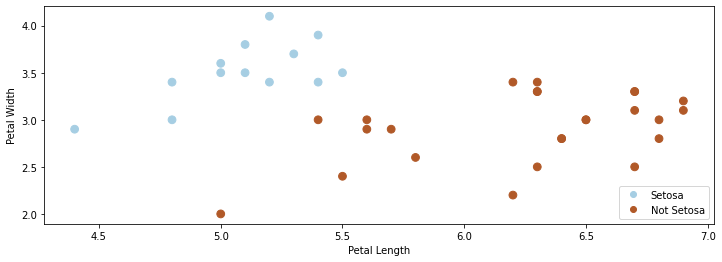

In [3]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
import warnings
warnings.filterwarnings("ignore")

# create 2d version of dataset and subsample it
X = iris_X.to_numpy()[:,:2]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

# Plot also the training points
p1 = plt.scatter(X[:, 0], X[:, 1], c=iris_y2, s=60, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Not Setosa'], loc='lower right')

We can run the dual version of the SVM by importing an implementation from `sklearn`:

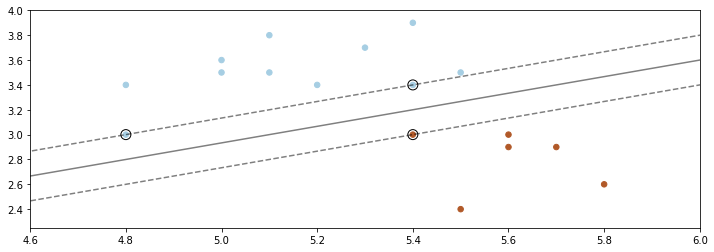

In [5]:
#https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from sklearn import svm

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000) # this optimizes the dual
# clf = svm.LinearSVC() # this optimizes for the primal
clf.fit(X, iris_y2)

plt.scatter(X[:, 0], X[:, 1], c=iris_y2, s=30, cmap=plt.cm.Paired)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlim([4.6, 6])
plt.ylim([2.25, 4])
plt.show()

# Algorithm: Support Vector Machine Classification (Dual Form)

* __Type__: Supervised learning (binary classification)
* __Model family__: Linear decision boundaries.
* __Objective function__: Dual of SVM optimization problem.
* __Optimizer__: Sequential minimal optimization.
* __Probabilistic interpretation__: No simple interpretation!